Data Collection

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/colorado_motor_vehicle_sales.csv')

# Display the first few rows to confirm it's loaded
print(data.head())

   year  quarter              county      sales
0  2008        1               Adams  231609000
1  2008        1            Arapahoe  550378000
2  2008        1  Boulder/Broomfield  176771000
3  2008        1              Denver  200103000
4  2008        1             Douglas   93259000


Data Preparation

In [4]:
print(data.info())  # View data types and non-null counts
print(data.isnull().sum())  # Check for missing values
data.dropna(inplace=True)  # Drop missing values (if any)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     501 non-null    int64 
 1   quarter  501 non-null    int64 
 2   county   501 non-null    object
 3   sales    501 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None
year       0
quarter    0
county     0
sales      0
dtype: int64


Exploratory Data Analysis

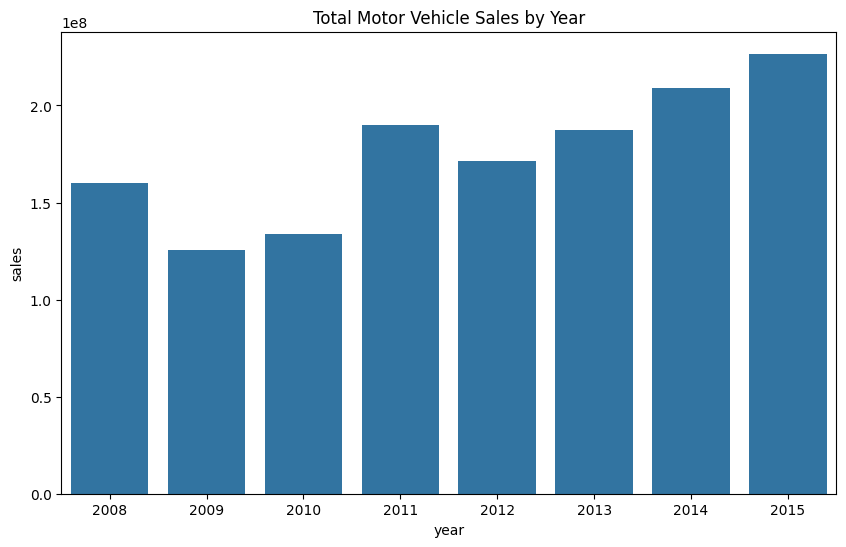

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visualize Total Sales by Year
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='sales', data=data, errorbar=None)
plt.title('Total Motor Vehicle Sales by Year')
plt.show()

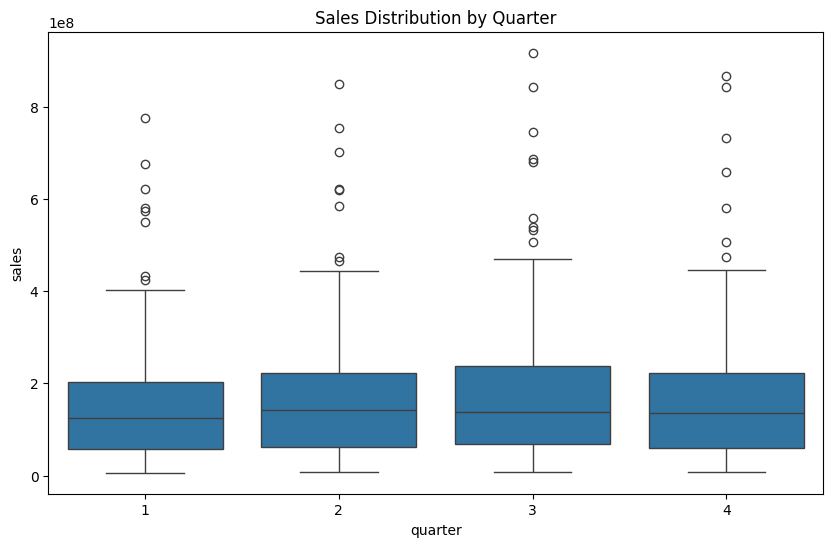

In [11]:
#Sales Distribution by Quarter
plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter', y='sales', data=data)
plt.title('Sales Distribution by Quarter')
plt.show()

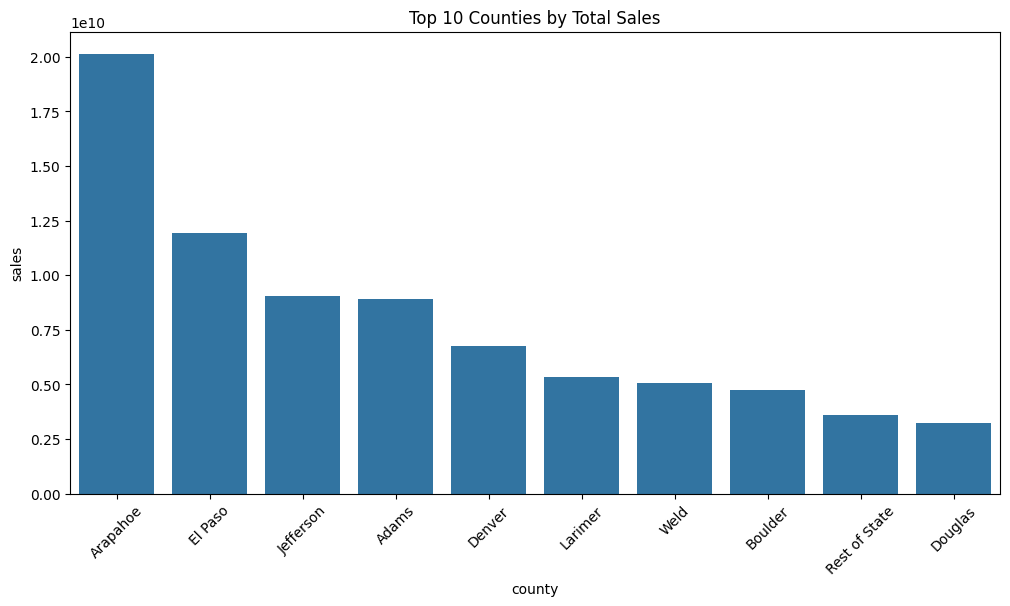

In [12]:
#Sales by County
top_counties = data.groupby('county')['sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='county', y='sales', data=top_counties)
plt.title('Top 10 Counties by Total Sales')
plt.xticks(rotation=45)
plt.show()

Statistical Analysis

In [19]:
# Convert 'County' to categorical and encode as numbers
data['county'] = data['county'].astype('category').cat.codes

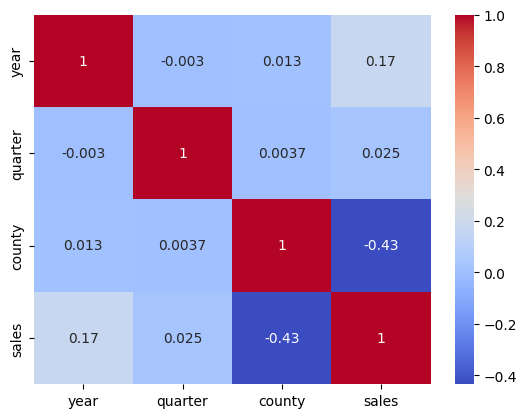

In [20]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Predictive Modeling

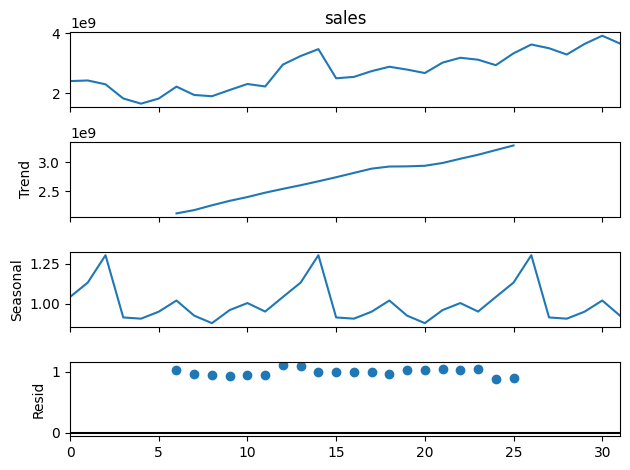

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_sales['sales'], model='multiplicative', period=12)
decomposition.plot()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   32
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -648.593
Date:                Mon, 23 Dec 2024   AIC                           1305.185
Time:                        09:52:04   BIC                           1310.921
Sample:                             0   HQIC                          1307.055
                                 - 32                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4799      0.564      0.851      0.395      -0.626       1.586
ar.L2         -0.1844      0.139     -1.325      0.185      -0.457       0.088
ma.L1         -0.5024      0.481     -1.045      0.2

<ipython-input-29-64533ab80db6>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=12, freq='M'), forecast, label='Forecasted Sales', color='red')


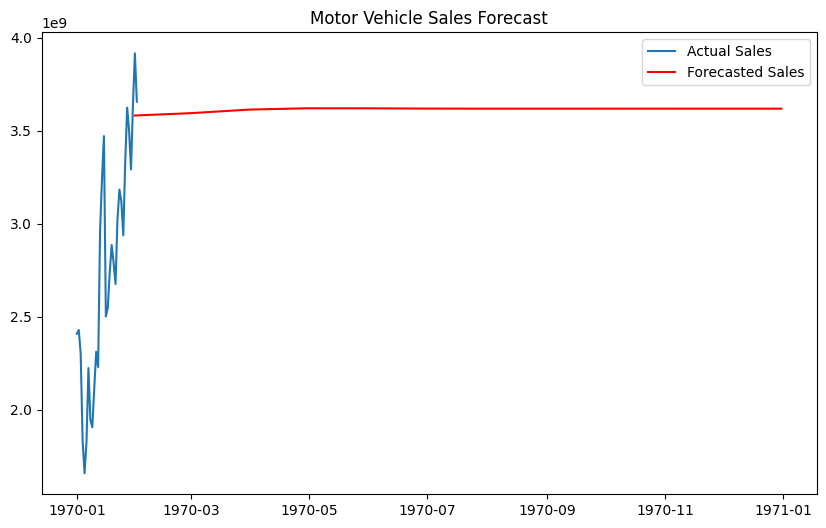

Mean Squared Error: 1.9552752087296803e+17


In [29]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

model = ARIMA(monthly_sales['sales'], order=(2, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot forecast vs actual sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['sales'], label='Actual Sales')
plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=12, freq='M'), forecast, label='Forecasted Sales', color='red')
plt.title('Motor Vehicle Sales Forecast')
plt.legend()
plt.show()

# Evaluate Model Performance
mse = mean_squared_error(monthly_sales['sales'][-12:], forecast)
print(f'Mean Squared Error: {mse}')


Reporting

In [30]:
report = f"""
Colorado Motor Vehicle Sales Data Analysis Report
=================================================
1. Data Overview
----------------
- Total Data Points: {len(data)}
- Time Frame: {monthly_sales.index.min()} to {monthly_sales.index.max()}

2. Exploratory Data Analysis
----------------------------
- Visualized total motor vehicle sales over time.
- Quarterly patterns and county-level sales were analyzed.

3. Statistical Analysis
-----------------------
- Correlation analysis between counties and sales.
- Seasonal decomposition revealed trends and seasonality.

4. Predictive Modeling
----------------------
- ARIMA model (order = (2, 1, 1)) forecasted the next 12 months.
- Model's Mean Squared Error (MSE): {mse:.2f}

5. Conclusions
--------------
- Analysis highlighted key patterns, helping with sales projections and planning.
"""
print(report)



Colorado Motor Vehicle Sales Data Analysis Report
1. Data Overview
----------------
- Total Data Points: 501
- Time Frame: 0 to 31

2. Exploratory Data Analysis
----------------------------
- Visualized total motor vehicle sales over time.
- Quarterly patterns and county-level sales were analyzed.

3. Statistical Analysis
-----------------------
- Correlation analysis between counties and sales.
- Seasonal decomposition revealed trends and seasonality.

4. Predictive Modeling
----------------------
- ARIMA model (order = (2, 1, 1)) forecasted the next 12 months.
- Model's Mean Squared Error (MSE): 195527520872968032.00

5. Conclusions
--------------
- Analysis highlighted key patterns, helping with sales projections and planning.

